## Etapa 01) Importação e Exploração Inicial da Base

Antes de qualquer análise, é fundamental entender a estrutura dos dados com os quais você está lidando. Nesta etapa, seu foco será **importar o dataset** e realizar uma primeira exploração para verificar:

- Quais colunas estão disponíveis?
- Quantas linhas existem?
- Existem dados ausentes?
- Quais são os tipos de variáveis?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./salario_profissionais_dados.csv", sep=",", header=0)

In [3]:
df.head(5)

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [6]:
df.shape

(3755, 10)

In [7]:
df.isnull().sum()

work_year              0
country                0
region                 0
experience_level       0
job_title              0
salary_in_usd          0
employee_residence     0
company_location       0
company_size           0
years_of_experience    0
dtype: int64

## Etapa 02) **Frequência e Distribuição das Categorias**

Agora que você já conhece a base, vamos explorar as variáveis **categóricas** — aquelas que representam grupos ou classificações, como os **cargos dos profissionais**.

Seu objetivo aqui é responder perguntas como:

- Cargos mais comuns
- Nível de experiência
- Tamanho da empresa

Essas informações ajudam a entender o perfil predominante da base e fornecem contexto para análises salariais futuras.

In [11]:
df.value_counts().head(10)

work_year  country                   region    experience_level  job_title       salary_in_usd  employee_residence  company_location  company_size  years_of_experience
2022       United States of America  Americas  SE                Data Scientist  141525         US                  US                M             6                      11
2023       United States of America  Americas  SE                Data Engineer   160000         US                  US                M             6                      10
2022       United States of America  Americas  SE                Data Scientist  141525         US                  US                M             7                       9
                                                                                 191475         US                  US                M             7                       8
                                                                 Data Engineer   130000         US                  US                M 

In [10]:
df['job_title'].value_counts(normalize=True).head(10) * 100

job_title
Data Engineer                27.696405
Data Scientist               22.370173
Data Analyst                 16.298269
Machine Learning Engineer     7.696405
Analytics Engineer            2.743009
Data Architect                2.689747
Research Scientist            2.183755
Applied Scientist             1.544607
Data Science Manager          1.544607
Research Engineer             0.985353
Name: proportion, dtype: float64

## **Etapa 03) Estatísticas Descritivas**

A principal variável numérica da base é `salary_in_usd`. Nesta etapa, você vai se aprofundar na análise estatística dessa variável para entender como os salários estão distribuídos.

- **Medidas de tendência central:** média, mediana
- **Medidas de dispersão:** desvio padrão, mínimo e máximo
- **Distribuição geral:** através de histogramas
- **Comparações por grupos:** especialmente por nível de experiência (usando boxplots)

In [12]:
# Comparando a média salarial por tamanho da empresa
df.groupby('company_size')['salary_in_usd'].mean()

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64

In [13]:
# Média e mediana da variável salary_in_usd
media = df['salary_in_usd'].mean()
mediana = df['salary_in_usd'].median()
print(f"Média salarial: {media:.2f}")
print(f"Mediana salarial: {mediana:.2f}")

Média salarial: 137570.39
Mediana salarial: 135000.00


In [14]:
# Medidas de dispersão da variável salary_in_usd
desvio_padrao = df['salary_in_usd'].std()
minimo = df['salary_in_usd'].min()
maximo = df['salary_in_usd'].max()
print(f"Desvio padrão: {desvio_padrao:.2f}")
print(f"Salário mínimo: {minimo}")
print(f"Salário máximo: {maximo}")

Desvio padrão: 63055.63
Salário mínimo: 5132
Salário máximo: 450000


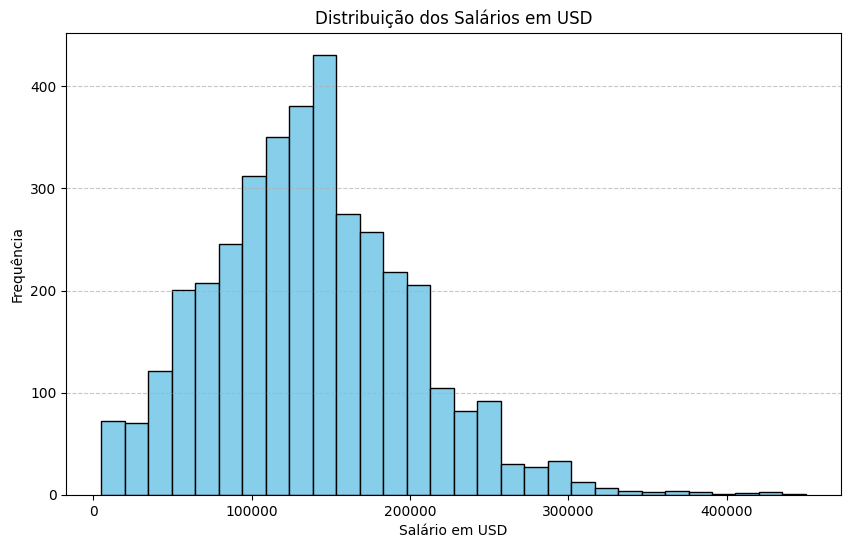

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Salários em USD')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

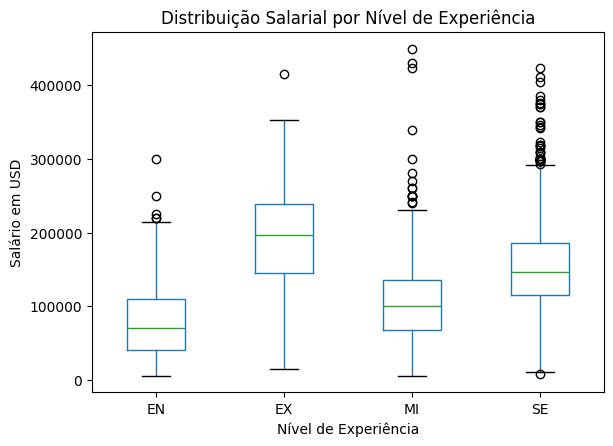

In [16]:
plt.figure(figsize=(10, 6))
df.boxplot(column='salary_in_usd', by='experience_level', grid=False)
plt.title('Distribuição Salarial por Nível de Experiência')
plt.suptitle('')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.show()

## **Etapa 04)  Comparações por País**

Agora que você já entendeu os salários em geral, é hora de investigar **como eles variam entre diferentes grupos**.

Nesta etapa, seu objetivo será:

- Verificar os **10 países** com as maiores médias salariais

Essas comparações são fundamentais para entender onde estão os maiores salários — seja em termos de função ou localização geográfica.

<aside>


</aside>

In [18]:
# Top 10 países com as maiores médias salariais
top10_paises = df.groupby('country')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
print(top10_paises)

country
Israel                      423834.000000
Malaysia                    200000.000000
Puerto Rico                 166000.000000
United States of America    152822.011651
Canada                      132222.905882
China                       125404.000000
New Zealand                 125000.000000
Bosnia and Herzegovina      120000.000000
Ireland                     114943.428571
Dominican Republic          110000.000000
Name: salary_in_usd, dtype: float64


## **Etapa 05) Correlações e Tendências**

Por fim, vamos analisar se existe alguma relação entre salário e outras variáveis **quantitativas** da base.

As perguntas principais aqui são:

- Existe alguma **tendência de aumento salarial com os anos?**
- Quanto maior o tempo de experiência, maior o salário?

Você irá utilizar uma **matriz de correlação** para investigar essas relações e interpretar os coeficientes gerados.

In [19]:
# Matriz de correlação entre salário, ano e tempo de experiência
correlacao = df[['salary_in_usd', 'work_year', 'years_of_experience']].corr()
print(correlacao)

                     salary_in_usd  work_year  years_of_experience
salary_in_usd             1.000000   0.228290             0.410723
work_year                 0.228290   1.000000             0.178878
years_of_experience       0.410723   0.178878             1.000000
